In [1]:
using PyPlot,JLD2

In [2]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("CGS.jl")

Main.CGS

### BIC calculation from fit routine

In [6]:
BIC(chi2,k,Nobs) = chi2 + k*log(Nobs)

BIC (generic function with 1 method)

In [12]:
println("BIC for p2 fits from EMB+V sims.")
println("BIC for 10s15 = ",BIC(2545,10,41))
println("BIC for 10s20 = ",BIC(3059,10,54))
println("BIC for 10s25 = ",BIC(4699,10,67))
println("BIC for 10s30 = ",BIC(4941,10,80))
println("BIC for 30s15 = ",BIC(316,10,41))
println("BIC for 30s20 = ",BIC(357,10,54))
println("BIC for 30s25 = ",BIC(590,10,67))
println("BIC for 30s30 = ",BIC(585,10,80))
println("BIC for 60s15 = ",BIC(108,10,41))
println("BIC for 60s20 = ",BIC(119,10,54))
println("BIC for 60s25 = ",BIC(201,10,67))
println("BIC for 60s30 = ",BIC(191,10,80))
println("BIC for 90s15 = ",BIC(70,10,41))
println("BIC for 90s20 = ",BIC(79,10,54))
println("BIC for 90s25 = ",BIC(127,10,67))
println("BIC for 90s30 = ",BIC(121,10,80))
println("BIC for 120s15 = ",BIC(56,10,41))
println("BIC for 120s20 = ",BIC(66,10,54))
println("BIC for 120s25 = ",BIC(101,10,67))
println("BIC for 120s30 = ",BIC(97,10,80))

BIC for p2 fits from EMB+V sims.
BIC for 10s15 = 2582.135720667043
BIC for 10s20 = 3098.889840465643
BIC for 10s25 = 4741.04692619391
BIC for 10s30 = 4984.820266346739
BIC for 30s15 = 353.1357206670431
BIC for 30s20 = 396.88984046564275
BIC for 30s25 = 632.0469261939097
BIC for 30s30 = 628.8202663467388
BIC for 60s15 = 145.13572066704307
BIC for 60s20 = 158.88984046564275
BIC for 60s25 = 243.04692619390966
BIC for 60s30 = 234.8202663467388
BIC for 90s15 = 107.13572066704307
BIC for 90s20 = 118.88984046564275
BIC for 90s25 = 169.04692619390966
BIC for 90s30 = 164.8202663467388
BIC for 120s15 = 93.13572066704307
BIC for 120s20 = 105.88984046564275
BIC for 120s25 = 143.04692619390966
BIC for 120s30 = 140.8202663467388


In [14]:
println("BIC for p3 fits from EMB+V sims.")
println("BIC for 10s15 = ",BIC(137,15,41))
println("BIC for 10s20 = ",BIC(238,15,54))
println("BIC for 10s25 = ",BIC(350,15,67))
println("BIC for 10s30 = ",BIC(472,15,80))
println("BIC for 30s15 = ",BIC(52,15,41))
println("BIC for 30s20 = ",BIC(69,15,54))
println("BIC for 30s25 = ",BIC(91,15,67))
println("BIC for 30s30 = ",BIC(109,15,80))
println("BIC for 60s15 = ",BIC(41,15,41))
println("BIC for 60s20 = ",BIC(52,15,54))
println("BIC for 60s25 = ",BIC(68,15,67))
println("BIC for 60s30 = ",BIC(76,15,80))
println("BIC for 90s15 = ",BIC(39,15,41))
println("BIC for 90s20 = ",BIC(48,15,54))
println("BIC for 90s25 = ",BIC(64,15,67))
println("BIC for 90s30 = ",BIC(68,15,80))
println("BIC for 120s15 = ",BIC(37,15,41))
println("BIC for 120s20 = ",BIC(47,15,54))
println("BIC for 120s25 = ",BIC(62,15,67))
println("BIC for 120s30 = ",BIC(66,15,80))

BIC for p3 fits from EMB+V sims.
BIC for 10s15 = 192.7035810005646
BIC for 10s20 = 297.8347606984641
BIC for 10s25 = 413.07038929086445
BIC for 10s30 = 537.7303995201082
BIC for 30s15 = 107.70358100056461
BIC for 30s20 = 128.83476069846412
BIC for 30s25 = 154.07038929086448
BIC for 30s30 = 174.73039952010822
BIC for 60s15 = 96.70358100056461
BIC for 60s20 = 111.83476069846412
BIC for 60s25 = 131.07038929086448
BIC for 60s30 = 141.73039952010822
BIC for 90s15 = 94.70358100056461
BIC for 90s20 = 107.83476069846412
BIC for 90s25 = 127.07038929086448
BIC for 90s30 = 133.73039952010822
BIC for 120s15 = 92.70358100056461
BIC for 120s20 = 106.83476069846412
BIC for 120s25 = 125.07038929086448
BIC for 120s30 = 131.73039952010822


In [9]:
println("BIC for p2 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(2897,10,41))
println("BIC for 10s20 = ",BIC(3633,10,54))
println("BIC for 10s25 = ",BIC(5252,10,67))
println("BIC for 10s30 = ",BIC(5677,10,80))
println("BIC for 30s15 = ",BIC(359,10,41))
println("BIC for 30s20 = ",BIC(417,10,54))
println("BIC for 30s25 = ",BIC(649,10,67))
println("BIC for 30s30 = ",BIC(667,10,80))
println("BIC for 60s15 = ",BIC(119,10,41))
println("BIC for 60s20 = ",BIC(133,10,54))
println("BIC for 60s25 = ",BIC(214,10,67))
println("BIC for 60s30 = ",BIC(211,10,80))
println("BIC for 90s15 = ",BIC(75,10,41))
println("BIC for 90s20 = ",BIC(84,10,54))
println("BIC for 90s25 = ",BIC(133,10,67))
println("BIC for 90s30 = ",BIC(129,10,80))
println("BIC for 120s15 = ",BIC(59,10,41))
println("BIC for 120s20 = ",BIC(69,10,54))
println("BIC for 120s25 = ",BIC(104,10,67))
println("BIC for 120s30 = ",BIC(102,10,80))

BIC for p2 fits from E+V sims.
BIC for 10s15 = 2934.135720667043
BIC for 10s20 = 3672.889840465643
BIC for 10s25 = 5294.04692619391
BIC for 10s30 = 5720.820266346739
BIC for 30s15 = 396.1357206670431
BIC for 30s20 = 456.88984046564275
BIC for 30s25 = 691.0469261939097
BIC for 30s30 = 710.8202663467388
BIC for 60s15 = 156.13572066704307
BIC for 60s20 = 172.88984046564275
BIC for 60s25 = 256.04692619390966
BIC for 60s30 = 254.8202663467388
BIC for 90s15 = 112.13572066704307
BIC for 90s20 = 123.88984046564275
BIC for 90s25 = 175.04692619390966
BIC for 90s30 = 172.8202663467388
BIC for 120s15 = 96.13572066704307
BIC for 120s20 = 108.88984046564275
BIC for 120s25 = 146.04692619390966
BIC for 120s30 = 145.8202663467388


In [10]:
println("BIC for p3 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(394,15,41))
println("BIC for 10s20 = ",BIC(675,15,54))
println("BIC for 10s25 = ",BIC(1214,15,67))
println("BIC for 10s30 = ",BIC(1414,15,80))
println("BIC for 30s15 = ",BIC(76,15,41))
println("BIC for 30s20 = ",BIC(104,15,54))
println("BIC for 30s25 = ",BIC(183,15,67))
println("BIC for 30s30 = ",BIC(216,15,80))
println("BIC for 60s15 = ",BIC(49,15,41))
println("BIC for 60s20 = ",BIC(54,15,54))
println("BIC for 60s25 = ",BIC(87,15,67))
println("BIC for 60s30 = ",BIC(102,15,80))
println("BIC for 90s15 = ",BIC(40,15,41))
println("BIC for 90s20 = ",BIC(46,15,54))
println("BIC for 90s25 = ",BIC(71,15,67))
println("BIC for 90s30 = ",BIC(79,15,80))
println("BIC for 120s15 = ",BIC(36,15,41))
println("BIC for 120s20 = ",BIC(45,15,54))
println("BIC for 120s25 = ",BIC(66,15,67))
println("BIC for 120s30 = ",BIC(70,15,80))

BIC for p3 fits from E+V sims.
BIC for 10s15 = 449.7035810005646
BIC for 10s20 = 734.8347606984642
BIC for 10s25 = 1277.0703892908646
BIC for 10s30 = 1479.7303995201082
BIC for 30s15 = 131.7035810005646
BIC for 30s20 = 163.83476069846412
BIC for 30s25 = 246.07038929086448
BIC for 30s30 = 281.7303995201082
BIC for 60s15 = 104.70358100056461
BIC for 60s20 = 113.83476069846412
BIC for 60s25 = 150.07038929086448
BIC for 60s30 = 167.73039952010822
BIC for 90s15 = 95.70358100056461
BIC for 90s20 = 105.83476069846412
BIC for 90s25 = 134.07038929086448
BIC for 90s30 = 144.73039952010822
BIC for 120s15 = 91.70358100056461
BIC for 120s20 = 104.83476069846412
BIC for 120s25 = 129.07038929086448
BIC for 120s30 = 135.73039952010822


In [11]:
println("BIC for lunar fits from E+V sims.")
println("BIC for 10s15 = ",BIC(284,18,41))
println("BIC for 10s20 = ",BIC(400,18,54))
println("BIC for 10s25 = ",BIC(350,18,67))
println("BIC for 10s30 = ",BIC(464,18,80))
println("BIC for 30s15 = ",BIC(52,18,41))
println("BIC for 30s20 = ",BIC(66,18,54))
println("BIC for 30s25 = ",BIC(88,18,67))
println("BIC for 30s30 = ",BIC(108,18,80))
println("BIC for 60s15 = ",BIC(41,18,41))
println("BIC for 60s20 = ",BIC(50,18,54))
println("BIC for 60s25 = ",BIC(66,18,67))
println("BIC for 60s30 = ",BIC(76,18,80))
println("BIC for 90s15 = ",BIC(34,18,41))
println("BIC for 90s20 = ",BIC(45,18,54))
println("BIC for 90s25 = ",BIC(62,18,67))
println("BIC for 90s30 = ",BIC(68,18,80))
println("BIC for 120s15 = ",BIC(32,18,41))
println("BIC for 120s20 = ",BIC(44,18,54))
println("BIC for 120s25 = ",BIC(60,18,67))
println("BIC for 120s30 = ",BIC(67,18,80))

BIC for lunar fits from E+V sims.
BIC for 10s15 = 350.84429720067754
BIC for 10s20 = 471.80171283815696
BIC for 10s25 = 425.6844671490374
BIC for 10s30 = 542.8764794241299
BIC for 30s15 = 118.84429720067754
BIC for 30s20 = 137.80171283815696
BIC for 30s25 = 163.6844671490374
BIC for 30s30 = 186.87647942412985
BIC for 60s15 = 107.84429720067754
BIC for 60s20 = 121.80171283815694
BIC for 60s25 = 141.6844671490374
BIC for 60s30 = 154.87647942412985
BIC for 90s15 = 100.84429720067754
BIC for 90s20 = 116.80171283815694
BIC for 90s25 = 137.6844671490374
BIC for 90s30 = 146.87647942412985
BIC for 120s15 = 98.84429720067754
BIC for 120s20 = 115.80171283815694
BIC for 120s25 = 135.6844671490374
BIC for 120s30 = 145.87647942412985


In [15]:
println("BIC for p4 fits from E+V sims.")
println("BIC for 10s15 = ",BIC(88,20,41))
println("BIC for 10s20 = ",BIC(190,20,54))
println("BIC for 10s25 = ",BIC(346,20,67))
println("BIC for 10s30 = ",BIC(450,20,80))
println("BIC for 30s15 = ",BIC(35,20,41))
println("BIC for 30s20 = ",BIC(59,20,54))
println("BIC for 30s25 = ",BIC(80,20,67))
println("BIC for 30s30 = ",BIC(98,20,80))
# println("BIC for 60s15 = ",BIC(,20,41))
# println("BIC for 60s20 = ",BIC(,20,54))
# println("BIC for 60s25 = ",BIC(,20,67))
# println("BIC for 60s30 = ",BIC(,20,80))
# println("BIC for 90s15 = ",BIC(,20,41))
# println("BIC for 90s20 = ",BIC(,20,54))
# println("BIC for 90s25 = ",BIC(,20,67))
# println("BIC for 90s30 = ",BIC(,20,80))
# println("BIC for 120s15 = ",BIC(,20,41))
# println("BIC for 120s20 = ",BIC(,20,54))
# println("BIC for 120s25 = ",BIC(,20,67))
# println("BIC for 120s30 = ",BIC(,20,80))

BIC for p4 fits from E+V sims.
BIC for 10s15 = 162.27144133408615
BIC for 10s20 = 269.7796809312855
BIC for 10s25 = 430.0938523878193
BIC for 10s30 = 537.6405326934777
BIC for 30s15 = 109.27144133408616
BIC for 30s20 = 138.7796809312855
BIC for 30s25 = 164.0938523878193
BIC for 30s30 = 185.6405326934776


### MCMC results

In [15]:
function print_vals(sigma,nyear,sim,model)
if String(sim)=="EMB" && isfile(string("MCMC/fromEMB/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("MCMC/fromEMB/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2")
elseif isfile(string("MCMC/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("MCMC/",model,"_mcmc",sigma,"s",nyear,"yrs.jld2")
else
    return println("MCMC file for ",sim," with ",model," model at ",sigma," secs and ",nyear," yrs doesn't exist!!!!")
end
jldmc = jldopen(String(mcfile),"r")
par_mcmc,lprob_mcmc = jldmc["par_mcmc"],jldmc["lprob_mcmc"]
iburn,samples = jldmc["iburn"], jldmc["indepsamples"]
nwalkers,nsteps = jldmc["nwalkers"],jldmc["nsteps"]
param = jldmc["param"]
pname = ["mu_1","P_1","t01","ecos1","esin1",
      "mu_2","P_2","t02","ecos2","esin2",
      "mu_3","P_3","t03","ecos3","esin3", 
        "tcosϕ","tsinϕ","Δϕ","σ_sys"]
    if model=="p4"
        pname=[pname[1:15];"mu_4";"P_4";"t04";"ecos4";"esin4";pname[end]]
    end
# open(output,"w") do io
println("           Fitted posterior params from ",mcfile)
for i=1:length(param)
println(pname[i]," : ",mean(vec(par_mcmc[:,iburn:nsteps,i]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,i]))) # writedlm(results,pbest_global)
end
println(pname[end]," : ",mean(vec(par_mcmc[:,iburn:nsteps,end]))," ± ",std(vec(par_mcmc[:,iburn:nsteps,end])))
println("Derived Parameters")
for i=1:length(param)
    if i%5 == 0
        println("M_p : ",mean(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH," ± ",std(vec(par_mcmc[:,iburn:nsteps,i-4])).* CGS.MSUN/CGS.MEARTH)
    end     
end
println(" lprob: ",mean(vec(lprob_mcmc[iburn:nsteps]))," ± ",std(vec(lprob_mcmc[iburn:nsteps])))
end
# end

print_vals (generic function with 2 methods)

In [43]:
function print_fits(sigma,nyear,sim,model)
if String(sim)=="EMB" && isfile(string("FITS/fromEMB/",model,"_fit",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("FITS/fromEMB/",model,"_fit",sigma,"s",nyear,"yrs.jld2")
elseif isfile(string("FITS/",model,"_fit",sigma,"s",nyear,"yrs.jld2"))
    mcfile = string("FITS/",model,"_fit",sigma,"s",nyear,"yrs.jld2")
else
    return println("FITS file for ",sim," with ",model," model at ",sigma," secs and ",nyear," yrs doesn't exist!!!!")
end
jldfit = jldopen(String(mcfile),"r")
param = jldfit["best_p3"]
lprob = jldfit["lprob_best_p3"]
pname = ["mu_1","P_1","t01","ecos1","esin1",
      "mu_2","P_2","t02","ecos2","esin2",
      "mu_3","P_3","t03","ecos3","esin3", 
        "tcosϕ","tsinϕ","Δϕ","σ_sys"]
if model=="p4"
        param = jldfit["best_p4"]
        lprob = jldfit["lprob_best_p4"]
        pname=[pname[1:15];"mu_4";"P_4";"t04";"ecos4";"esin4";pname[end]]
    end

if sim=="nomoon" && model=="moon"
        param = jldfit["best_p3"]
        lprob = jldfit["lprob_best_p3"]
    elseif model=="moon" 
        param = jldfit["best_dp"]
        lprob = jldfit["lprob_best_dp"]
end
# println("           Fitted params from ",mcfile)
# for i=1:length(param)
#     println(pname[i]," : ",param[i])
#     end
# println("Derived Parameters")
# for i=1:length(param)
#     if i%5 == 0
#         println("M_p : ",param[i-4].* CGS.MSUN/CGS.MEARTH)
#         end
# # end
# println(" lprob: ",lprob)
return param
end

print_fits (generic function with 1 method)

In [110]:
sigs = [10.0,30.0,60.0,90.0] ./ (3600 *24)
years = [30.0,25.0,20.0,15.0] 
M10=[269.8687043482864 38.78034735184125;308.9012847385663 41.65155221979512; 258.1013421938211 53.674484877388;265.52999284710415 58.76046546543657]
P10=[]
# M30=[236.05157683856774 49.32203000483943;306.646167648616 63.29944058635372;]
M03=[269.8687043482864  38.78034735184125;236.05157683856774  49.32203000483943;202.89944419683977  63.32042498534476;187.75053574997204 71.21518676444603]
#1.759665847807534e15  7.357958349600916e17]
s03=[8.898475627882412e-8 1.8717875887632705e-8;9.364261795690401e-8 3.897024074198955e-8;
1.3891749992447194e-7 9.813385730119545e-8; 2.3685715858756926e-7 1.844798263128857e-7]
M03

4×2 Array{Float64,2}:
 269.869  38.7803
 236.052  49.322 
 202.899  63.3204
 187.751  71.2152

In [112]:
totalsig=sqrt.((sigs.^2 + s03[:,1]))

4-element Array{Float64,1}:
 0.0003199698038034831
 0.0004628238212990363
 0.0007881437599475269
 0.001149750669941972 

In [115]:
totalsig .* 3600 * 24

4-element Array{Float64,1}:
 27.64539104862094 
 39.987978160236736
 68.09562085946632 
 99.33845788298638 

In [118]:
M03[:,2] \ totalsig

1.2830362381037918e-5

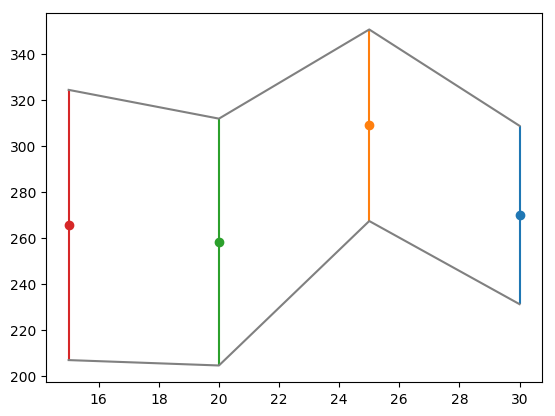

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16422e978>

In [132]:
errorbar(30,M10[:,1][1],M10[:,2][1],fmt="o")
errorbar(25,M10[:,1][2],M10[:,2][2],fmt="o")
errorbar(20,M10[:,1][3],M10[:,2][3],fmt="o")
errorbar(15,M10[:,1][4],M10[:,2][4],fmt="o")
# plot(years,M10[:,1],color="black")
plot(years,M10[:,1]+M10[:,2],color="grey")
plot(years,M10[:,1]-M10[:,2],color="grey")

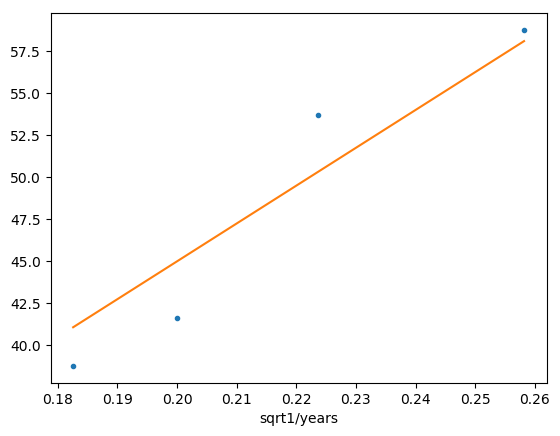

PyObject Text(0.5, 24.0, 'sqrt1/years')

In [121]:
plot(sqrt.( 1 ./ years),M10[:,2],".")
plot(sqrt.( 1 ./ years),sqrt.( 1 ./ years).*225)
xlabel("sqrt1/years")

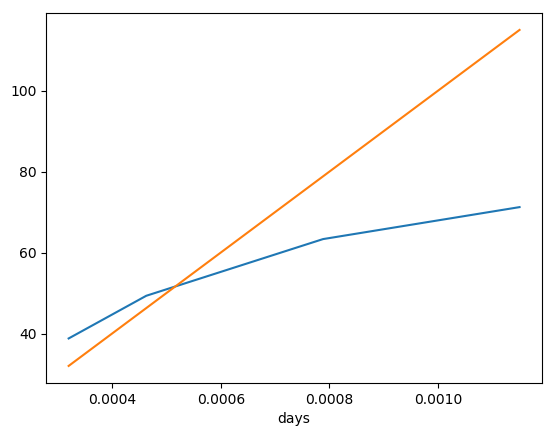

PyObject Text(0.5, 24.0, 'days')

In [117]:
plot(totalsig,M03[:,2])
plot(totalsig,totalsig.*10^5)
xlabel("days")

In [167]:
# include("plot_emcee.jl")
# include("corner_plot.jl")
# include("plot_likelihood.jl")
include("plot_ttvs.jl")
sigs=[10.0,30.0,60.0,90.0]#,120.0]
years=[30.0,25.0,20.0,15.0]
for i=1:length(sigs)
    for j=1:length(years)
# plot_emcee(sigs[i],years[j],"noEMB","moon",true)
# corner_plot(sigs[i],years[j],"noEMB","moon",50,true) #still need to run moon true
# plot_likelihood(sigs[i],years[j],"noEMB","moon","moon",30,true) 
# plot_ttvs(sigs[i],years[i],"EMB","p3",false) 
    end
end

PyCall.PyError: [91mPyError ($(Expr(:escape, :(ccall(#= /Users/bethleelindor/.julia/packages/PyCall/BcTLp/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'FileNotFoundError'>[39m
[91mFileNotFoundError(2, 'No such file or directory')[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/pyplot.py", line 689, in savefig[39m
[91m    res = fig.savefig(*args, **kwargs)[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/figure.py", line 2094, in savefig[39m
[91m    self.canvas.print_figure(fname, **kwargs)[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2075, in print_figure[39m
[91m    **kwargs)[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 521, in print_png[39m
[91m    cbook.open_file_cm(filename_or_obj, "wb") as fh:[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/contextlib.py", line 112, in __enter__[39m
[91m    return next(self.gen)[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 407, in open_file_cm[39m
[91m    fh, opened = to_filehandle(path_or_file, mode, True, encoding)[39m
[91m  File "/Users/bethleelindor/.julia/conda/3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 392, in to_filehandle[39m
[91m    fh = open(fname, flag, encoding=encoding)[39m


In [164]:
sigs,years

([10.0, 30.0, 60.0, 90.0], [30.0, 25.0, 20.0, 15.0])

### Linear Fit to Posterior mean and/or std

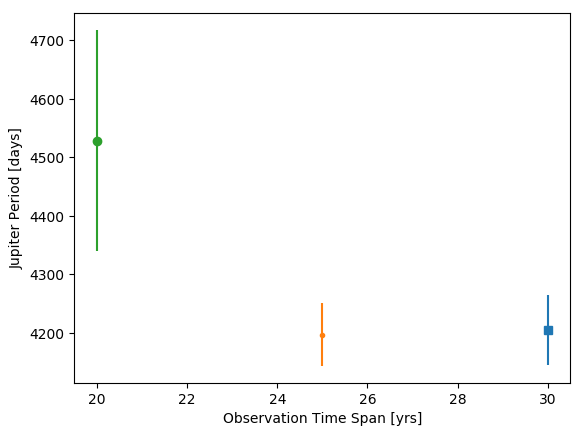

PyObject Text(0.5, 24.0, 'Observation Time Span [yrs]')

In [152]:
function plot_col(col_num)
errorbar(30,mean(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),std(p_mc33["par_mcmc"][:,p_mc33["iburn"]:p_mc33["nsteps"],col_num]),fmt="s")#,color="black",mec="black",mfc="white")
errorbar(25,mean(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc325["nsteps"],col_num]),std(p_mc325["par_mcmc"][:,p_mc325["iburn"]:p_mc325["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
errorbar(20,mean(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),std(p_mc32["par_mcmc"][:,p_mc32["iburn"]:p_mc32["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
# errorbar(15,mean(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),std(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
# errorbar(10,mean(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),std(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
    xlabel("Observation Time Span [yrs]")
end
    ylabel("Jupiter Period [days]")
plot_col(12)

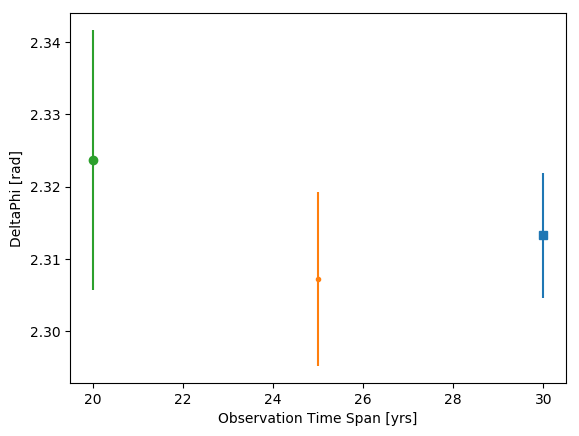

PyObject Text(0.5, 24.0, 'Observation Time Span [yrs]')

In [151]:
function plot_col(col_num,f1,f2,f3,f4)
errorbar(30,mean(m_mc33["par_mcmc"][:,m_mc33["iburn"]:m_mc33["nsteps"],col_num]),std(m_mc33["par_mcmc"][:,m_mc33["iburn"]:m_mc33["nsteps"],col_num]),fmt="s")#,color="black",mec="black",mfc="white")
errorbar(25,mean(m_mc325["par_mcmc"][:,m_mc325["iburn"]:m_mc325["nsteps"],col_num]),std(m_mc325["par_mcmc"][:,m_mc325["iburn"]:m_mc325["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
errorbar(20,mean(m_mc32["par_mcmc"][:,m_mc32["iburn"]:m_mc32["nsteps"],col_num]),std(m_mc32["par_mcmc"][:,m_mc32["iburn"]:m_mc32["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
# errorbar(15,mean(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),std(p_mc115["par_mcmc"][:,p_mc115["iburn"]:p_mc115["nsteps"],col_num]),fmt=".")#,color="black",mec="black",mfc="white")
# errorbar(10,mean(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),std(p_mc31["par_mcmc"][:,p_mc31["iburn"]:p_mc31["nsteps"],col_num]),fmt="o")#,color="black",mec="black",mfc="white")
    xlabel("Observation Time Span [yrs]")
end
    ylabel("DeltaPhi [rad]")
plot_col(18)

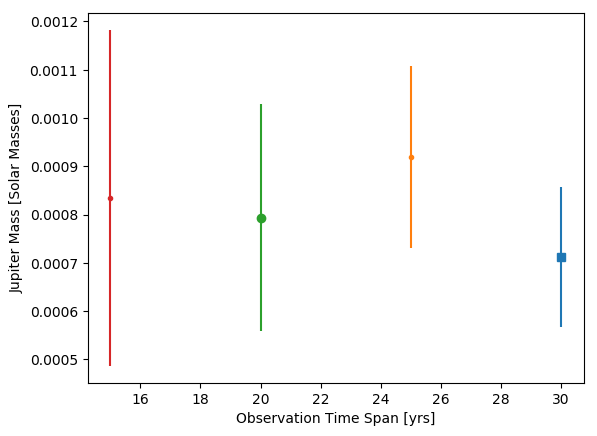

PyObject Text(24.000000000000014, 0.5, 'Jupiter Mass [Solar Masses]')

In [32]:
plot_col(11)
ylabel("Jupiter Mass [Solar Masses]")

### 2-planet MCMC

In [20]:
include("MCMC.jl")

MCMC (generic function with 1 method)

In [21]:
1-sum(m_33["ntrans"][1:2] )/2 * log(667.8479408806473)
# Nobs = sum()

-259.1624205684809

In [23]:
MCMC("MCMC/p2_mcmc30.0s30.0yrs.jld2",[4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722],
    -259.1624205684809,10000,50,2,m_33["ntrans"][1:2],m_33["tt0"],m_33["tt"],m_33["sigtt"],true,true)

Parameters from fit: [4.513519229108455e-6, 224.70077801541302, 2.4335037687537777e6, -0.0175050266179791, -0.025801638584714393, 2.964754129377914e-6, 365.25643897142635, 2.4336244077652446e6, 0.003030566580559538, -0.01953468392084722]
Maximum log Prob from fit: -259.1624205684809
Step: 193 Walker: 42 Trial Log Prob: 426.49314303794404 Prob: 1.2710845222989337e-7 Frac: 0.4260526861646961
Step: 293 Walker: 34 Trial Log Prob: 473.82203892999183 Prob: 1.005490785208814 Frac: 0.4230558972256389
Step: 370 Walker: 49 Trial Log Prob: 493.2463334225217 Prob: 0.25319213944931385 Frac: 0.4233201794691605
Step: 572 Walker: 36 Trial Log Prob: 517.5322863903355 Prob: 0.001594701592098923 Frac: 0.40918631497936053
Step: 584 Walker: 35 Trial Log Prob: 513.5953264857309 Prob: 0.4843221013987992 Frac: 0.4091485352064417
Step: 608 Walker: 46 Trial Log Prob: 518.8336758842289 Prob: 0.07254184825454627 Frac: 0.4077839189367022
Number of steps: 1000 Acceptance Rate: 0.39362
Step: 1001 Walker: 10 Trial Lo

([75.28769233479389 219.3594460186767 … 516.4881994945473 516.4881994945473; -444.65886672058883 -179.91995136093811 … 518.9664783752439 518.9664783752439; … ; -6.207035479125622 8.101604707805357 … 515.0457994095664 516.7171326214575; -590.5867961707044 -590.5867961707044 … 516.3621801274104 514.7776681213268], [4.445630411721898e-6 4.415787023431983e-6 … 4.206582338987755e-6 4.206582338987755e-6; 4.422629575203517e-6 4.434748781693544e-6 … 4.668535978959624e-6 4.668535978959624e-6; … ; 4.421228165235299e-6 4.487950235042027e-6 … 5.371583333236327e-6 5.212825825179325e-6; 4.358749104252416e-6 4.358749104252416e-6 … 4.278023225622351e-6 4.2086541016973845e-6]

[224.700772340187 224.7007758152718 … 224.70077643355427 224.70077643355427; 224.7007664603429 224.700765708711 … 224.70077526896767 224.70077526896767; … ; 224.7007948253631 224.7007858316187 … 224.70077304449623 224.70077747636677; 224.70077991916642 224.70077991916642 … 224.70078876795066 224.70079300411328]

[2.43350376875570